### Изменение таблиц в Pandas

In [135]:
import pandas as pd

In [136]:
df=pd.read_csv('../Data/laptop_price.csv', encoding='windows 1251')
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Задание 1.
1. Скачать данные по ссылке
https://www.kaggle.com/datasets/ionaskel/laptop-prices
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

- 1.1 Создать новый признак Cpu_Company, который будет 
содержать только название фирмы, которая произвела CPU


In [137]:
df['Cpu_Company'] = df['Cpu'].apply(lambda x: x.split(' ')[0])
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel


- 1.2 Создать новый признак Memory_Amount, который будет 
содержать только количество Gb памяти без указания типа 
носителя

In [138]:
def memory(memory_str):
    gb = memory_str.split(' ')[0]
    if gb.endswith('GB'):
        gb = float(gb[:-2])
    elif gb.endswith('TB'):
        gb = float(gb[:-2])*1024
    return gb


df['Memory_Amount'] = df['Memory'].apply(memory)
df.head(3)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256.0



- 1.3 Создать новый признак Memory_Type, который будет 
содержать только тип носителя (HDD/SDD/др.)

In [139]:
df['Memory_Type'] = df["Memory"].apply(lambda x: x.split(' ')[1])
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128.0,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128.0,Flash
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256.0,SSD


- 1.4 Удалите признаки Memory и ScreenResolution

In [140]:
df.drop(columns=['Memory'], inplace=True)
df.head(3)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128.0,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128.0,Flash
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256.0,SSD


In [141]:
df = df.drop(columns='ScreenResolution')
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128.0,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128.0,Flash
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256.0,SSD


### Задание 2.

2.1 Создайте признак SSD, который изначально равен 0

In [142]:
df['SSD'] = 0
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128.0,SSD,0
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128.0,Flash,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256.0,SSD,0


2.2 Поставьте в признаке SSD 1, если ноутбук 
действительно с типом носителя SSD

In [143]:
df.loc[df['Memory_Type'] == 'SSD', 'SSD'] = 1
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128.0,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128.0,Flash,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256.0,SSD,1


2.3 Уберите в признаке Weight значения 'kg' и поменяйте его 
тип данных на вещественный

In [144]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df.head(3)                                

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128.0,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128.0,Flash,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256.0,SSD,1


In [145]:
df.dtypes

laptop_ID          int64
Company           object
Product           object
TypeName          object
Inches           float64
Cpu               object
Ram               object
Gpu               object
OpSys             object
Weight           float64
Price_euros      float64
Cpu_Company       object
Memory_Amount    float64
Memory_Type       object
SSD                int64
dtype: object

### Задание 3.
Создайте датафрейм с клиентами:

laptop_id - это индексы датафрейма с ноутбуками

In [146]:
clients = pd.DataFrame({
 'client_id': [45, 32, 67, 33, 43],
 'laptop_id': [506, 398, 710, 120, 1999]
})
clients

,client_id,laptop_id
0,45,506
1,32,398
2,67,710
3,33,120
4,43,1999


In [147]:
client_laptop = clients.set_index('laptop_id')
client_laptop

,client_id
laptop_id,
506,45
398,32
710,67
120,33
1999,43


In [148]:
df_laptop = df.set_index('laptop_ID')
df_laptop.head(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
laptop_ID,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128.0,SSD,1
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128.0,Flash,0
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256.0,SSD,1


3.1 Присоедините к таблице clients данные по ноутбукам 
через метод join

In [149]:
df_laptop_join = client_laptop.join(df_laptop)
df_laptop_join.head(3)

,client_id,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
laptop_id,,,,,,,,,,,,,,,
506,45,Lenovo,ThinkPad L570,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,Windows 10,2.3,911.0,Intel,256.0,SSD,1.0
398,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,67,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P 3.6GHz,8GB,AMD Radeon R7,Windows 10,2.2,429.0,AMD,1024.0,HDD,0.0


3.2 Присоедините к таблице clients данные по ноутбукам 
через метод merge


In [150]:
merged = df.merge(clients, left_on='laptop_ID', right_on='client_id')
merged.head(3)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD,client_id,laptop_id
0,32,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,14.0,AMD E-Series E2-6110 1.5GHz,2GB,AMD Radeon R2,Windows 10,1.65,199.00,AMD,32.0,Flash,0,32,398
1,33,HP,17-ak001nv (A6-9220/4GB/500GB/Radeon,Notebook,17.3,AMD A6-Series 9220 2.5GHz,4GB,AMD Radeon 530,Windows 10,2.71,439.00,AMD,500.0,HDD,0,33,120
2,43,Asus,X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Nvidia GeForce 940MX,Linux,2.30,522.99,Intel,1024.0,HDD,0,43,1999


### Задание 4.
Составьте несколько сводных таблиц

4.1 Найдите среднюю стоимость ноутбуков в зависимости 
от компании производителя<br>
Отсортируйте от меньшей стоимости к большей

In [151]:
df.groupby('Company').agg({'Price_euros': 'mean'}).sort_values('Price_euros')

,Price_euros
Company,
Vero,217.425000
Mediacom,295.000000
Chuwi,314.296667
Acer,626.775825
Fujitsu,729.000000
HP,1067.774854
Lenovo,1086.384444
Asus,1104.169367
Xiaomi,1133.462500


4.2 Найдите минимальную, среднюю и максимальную 
стоимости ноутбуков в зависимости от производителя 
процессора

In [152]:
df.groupby('Cpu_Company').agg({'Price_euros': ['min','mean','max']})

Price_euros                     
                    min         mean     max
Cpu_Company                                 
AMD               199.0   560.638871  2199.0
Intel             174.0  1152.214145  6099.0
Samsung           659.0   659.000000   659.0

4.3 Постройте таблицу с подсчетом количества ноутбуков в 
данных в зависимости от производителя CPU и ОЗУ

In [153]:
df.pivot_table(index=['Cpu','Gpu'], aggfunc={'Company':'count'})

Company
Cpu                             Gpu                          
AMD A10-Series 9600P 2.4GHz     AMD Radeon R5 430           1
                                AMD Radeon R7 M440          1
AMD A10-Series 9620P 2.5GHz     AMD Radeon 530              1
                                AMD Radeon RX 540           1
AMD A10-Series A10-9620P 2.5GHz AMD Radeon 530              1
...                                                       ...
Intel Xeon E3-1505M V6 3GHz     Nvidia Quadro M1200         1
                                Nvidia Quadro M620          1
Intel Xeon E3-1535M v5 2.9GHz   Nvidia Quadro M2000M        1
Intel Xeon E3-1535M v6 3.1GHz   Nvidia Quadro M2200M        1
Samsung Cortex A72&A53 2.0GHz   ARM Mali T860 MP4           1

[291 rows x 1 columns]

4.4 Постройте таблицу с подсчетом средней стоимости 
ноутбуков в данных в зависимости от операционной 
системы и GB памяти

In [154]:
pd.crosstab(index=df['OpSys'], columns=df['Ram'],values=df['Price_euros'],aggfunc='mean')

Ram,12GB,16GB,24GB,2GB,32GB,4GB,64GB,6GB,8GB
OpSys,,,,,,,,,
Android,NaN,NaN,NaN,NaN,NaN,434.000000,NaN,NaN,NaN
Chrome OS,NaN,2199.000000,NaN,234.333333,NaN,397.726316,NaN,NaN,1122.000000
Linux,949.000000,974.000000,NaN,NaN,NaN,417.705625,NaN,NaN,814.618148
Mac OS X,NaN,2139.970000,NaN,NaN,NaN,959.000000,NaN,NaN,1167.333333
No OS,NaN,1265.316667,NaN,NaN,NaN,393.980625,NaN,NaN,722.674516
Windows 10,1205.998261,1916.548315,2206.333333,257.534211,3413.085882,604.317509,3975.0,615.206341,1190.119217
Windows 10 S,NaN,2589.000000,NaN,NaN,NaN,673.997500,NaN,NaN,1668.950000
Windows 7,2299.000000,2840.400000,NaN,NaN,NaN,1036.020833,NaN,NaN,1739.483704
macOS,NaN,2611.806667,NaN,NaN,NaN,NaN,NaN,NaN,1490.978000


### Задание 5*.
Ответьте на несколько вопросов

5.1 Ноутбуков каких компаний и с каким процессором 
больше?

In [155]:
import matplotlib.pyplot as plt

In [156]:
max_book = pd.crosstab(index=df['Company'], columns=df['Ram'],values=df['Company'],aggfunc='count')
max_book

Ram,12GB,16GB,24GB,2GB,32GB,4GB,64GB,6GB,8GB
Company,,,,,,,,,
Acer,3.0,4.0,NaN,3.0,NaN,57.0,NaN,3.0,33.0
Apple,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,16.0
Asus,5.0,35.0,2.0,4.0,3.0,45.0,1.0,2.0,61.0
Chuwi,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
Dell,5.0,54.0,NaN,3.0,7.0,63.0,NaN,4.0,161.0
Fujitsu,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0
Google,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
HP,6.0,13.0,NaN,5.0,NaN,90.0,NaN,18.0,142.0
Huawei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


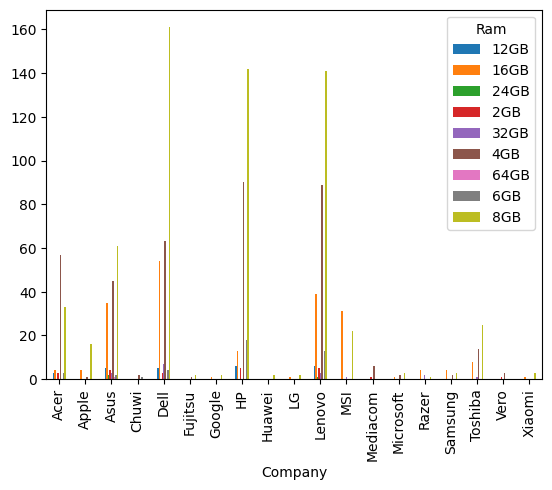

In [157]:
max_book.plot.bar();

5.2 С каким типом памяти и с каким объемом памяти 
больше ноутбуков?

In [158]:
max_ram = pd.crosstab(index=df['Cpu'], columns=df['Ram'],values=df['Cpu'],aggfunc='count')
max_ram

Ram,12GB,16GB,24GB,2GB,32GB,4GB,64GB,6GB,8GB
Cpu,,,,,,,,,
AMD A10-Series 9600P 2.4GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
AMD A10-Series 9620P 2.5GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
AMD A10-Series A10-9620P 2.5GHz,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
AMD A12-Series 9700P 2.5GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
AMD A12-Series 9720P 2.7GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
Intel Pentium Quad Core N4200 1.1GHz,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN
Intel Xeon E3-1505M V6 3GHz,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Intel Xeon E3-1535M v5 2.9GHz,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
